In [8]:
df = read.csv('student-mat.csv', sep = ';')
head(df)


school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,2,15,14,15
GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,4,6,10,10
GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,10,15,15,15


In [9]:
summary(df)

 school   sex          age       address famsize   Pstatus      Medu      
 GP:349   F:208   Min.   :15.0   R: 88   GT3:281   A: 41   Min.   :0.000  
 MS: 46   M:187   1st Qu.:16.0   U:307   LE3:114   T:354   1st Qu.:2.000  
                  Median :17.0                             Median :3.000  
                  Mean   :16.7                             Mean   :2.749  
                  3rd Qu.:18.0                             3rd Qu.:4.000  
                  Max.   :22.0                             Max.   :4.000  
      Fedu             Mjob           Fjob            reason      guardian  
 Min.   :0.000   at_home : 59   at_home : 20   course    :145   father: 90  
 1st Qu.:2.000   health  : 34   health  : 18   home      :109   mother:273  
 Median :2.000   other   :141   other   :217   other     : 36   other : 32  
 Mean   :2.522   services:103   services:111   reputation:105               
 3rd Qu.:3.000   teacher : 58   teacher : 29                                
 Max.   :4.00

In [15]:
any(is.na(df)) #Check for NA values

[1] FALSE

In [14]:
str(df)

'data.frame':	395 obs. of  33 variables:
 $ school    : Factor w/ 2 levels "GP","MS": 1 1 1 1 1 1 1 1 1 1 ...
 $ sex       : Factor w/ 2 levels "F","M": 1 1 1 1 1 2 2 1 2 2 ...
 $ age       : int  18 17 15 15 16 16 16 17 15 15 ...
 $ address   : Factor w/ 2 levels "R","U": 2 2 2 2 2 2 2 2 2 2 ...
 $ famsize   : Factor w/ 2 levels "GT3","LE3": 1 1 2 1 1 2 2 1 2 1 ...
 $ Pstatus   : Factor w/ 2 levels "A","T": 1 2 2 2 2 2 2 1 1 2 ...
 $ Medu      : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ Mjob      : Factor w/ 5 levels "at_home","health",..: 1 1 1 2 3 4 3 3 4 3 ...
 $ Fjob      : Factor w/ 5 levels "at_home","health",..: 5 3 3 4 3 3 3 5 3 3 ...
 $ reason    : Factor w/ 4 levels "course","home",..: 1 1 3 2 2 4 2 2 2 2 ...
 $ guardian  : Factor w/ 3 levels "father","mother",..: 2 1 2 2 1 2 2 2 2 2 ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ schoolsup : Factor w/

In [16]:
library(ggplot2)
library(ggthemes)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  1.4.1     ✔ purrr   0.2.4
✔ tidyr   0.7.2     ✔ dplyr   0.7.4
✔ readr   1.1.1     ✔ stringr 1.2.0
✔ tibble  1.4.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [20]:
#take the numeric columns 
num.cols = sapply(df, is.numeric)

#filter to numeric columns for correlations
cor.data = cor(df[,num.cols])

(cor.data)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000000,-0.163658419,-0.163438069,0.070640721,-0.004140037,0.24366538,0.053940096,0.01643439,0.126963880,0.131124605,0.11727605,-0.062187369,0.17523008,-0.06408150,-0.14347405,-0.16157944
Medu,-0.163658419,1.000000000,0.623455112,-0.171639305,0.064944137,-0.23667996,-0.003914458,0.03089087,0.064094438,0.019834099,-0.04712346,-0.046877829,0.10028482,0.20534100,0.21552717,0.21714750
Fedu,-0.163438069,0.623455112,1.000000000,-0.158194054,-0.009174639,-0.25040844,-0.001369727,-0.01284553,0.043104668,0.002386429,-0.01263102,0.014741537,0.02447289,0.19026994,0.16489339,0.15245694
traveltime,0.070640721,-0.171639305,-0.158194054,1.000000000,-0.100909119,0.09223875,-0.016807986,-0.01702494,0.028539674,0.138325309,0.13411575,0.007500606,-0.01294378,-0.09303999,-0.15319796,-0.11714205
studytime,-0.004140037,0.064944137,-0.009174639,-0.100909119,1.000000000,-0.17356303,0.039730704,-0.14319841,-0.063903675,-0.196019263,-0.25378473,-0.075615863,-0.06270018,0.16061192,0.13588000,0.09781969
failures,0.243665377,-0.236679963,-0.250408444,0.092238746,-0.173563031,1.00000000,-0.044336626,0.09198747,0.124560922,0.136046931,0.14196203,0.065827282,0.06372583,-0.35471761,-0.35589563,-0.36041494
famrel,0.053940096,-0.003914458,-0.001369727,-0.016807986,0.039730704,-0.04433663,1.000000000,0.15070144,0.064568411,-0.077594357,-0.11339731,0.094055728,-0.04435409,0.02216832,-0.01828135,0.05136343
freetime,0.016434389,0.030890867,-0.012845528,-0.017024944,-0.143198407,0.09198747,0.150701444,1.00000000,0.285018715,0.209000848,0.14782181,0.075733357,-0.05807792,0.01261293,-0.01377714,0.01130724
goout,0.126963880,0.064094438,0.043104668,0.028539674,-0.063903675,0.12456092,0.064568411,0.28501871,1.000000000,0.266993848,0.42038575,-0.009577254,0.04430222,-0.14910397,-0.16225003,-0.13279147
Dalc,0.131124605,0.019834099,0.002386429,0.138325309,-0.196019263,0.13604693,-0.077594357,0.20900085,0.266993848,1.000000000,0.64754423,0.077179582,0.11190803,-0.09415879,-0.06412018,-0.05466004


In [31]:
library(corrplot)
library(corrgram)

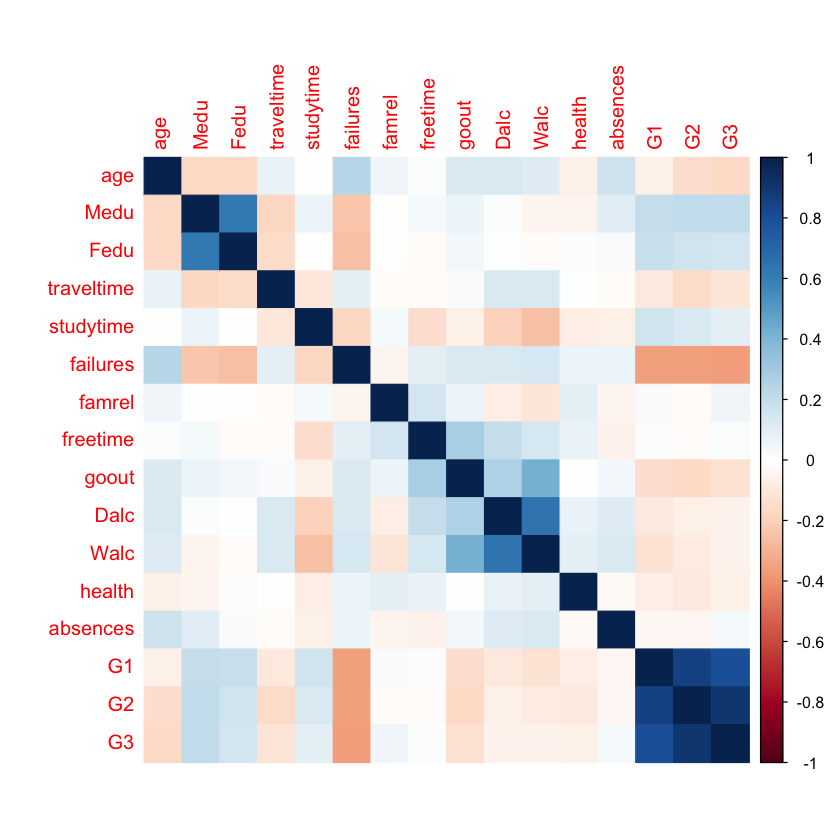

In [26]:
corrplot(cor.data, method = 'color')

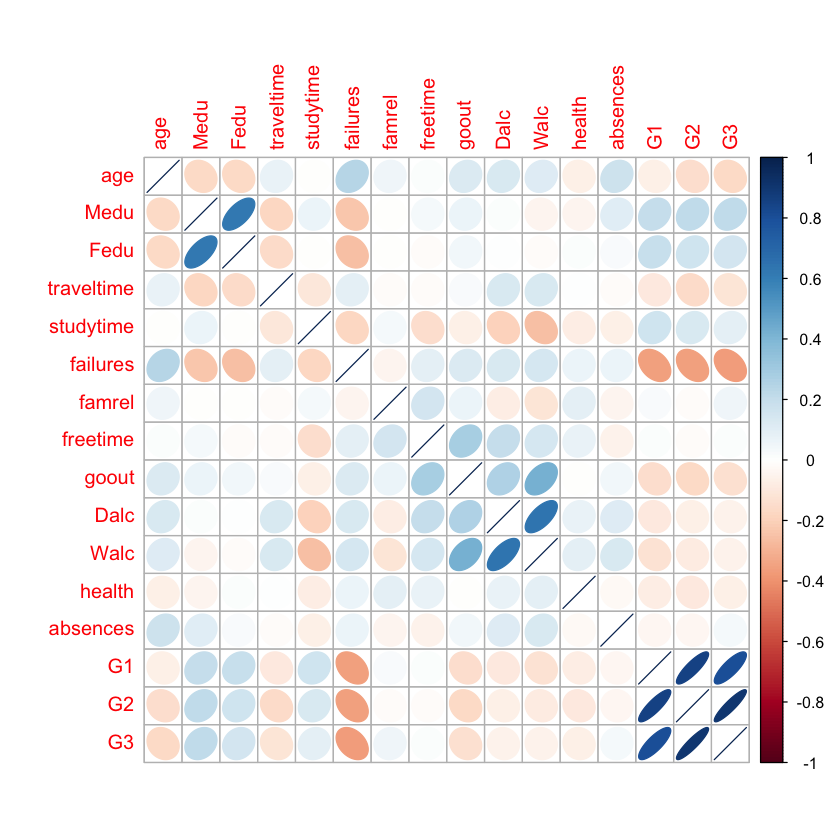

In [28]:
corrplot(cor.data, method = 'ellipse')

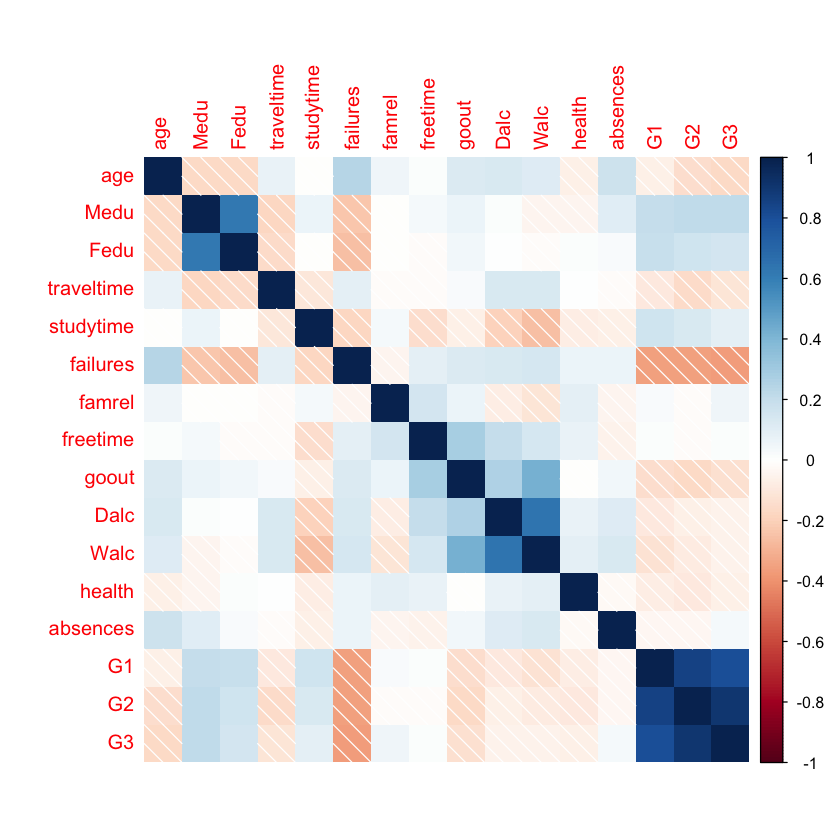

In [30]:
corrplot(cor.data, method = 'shade')

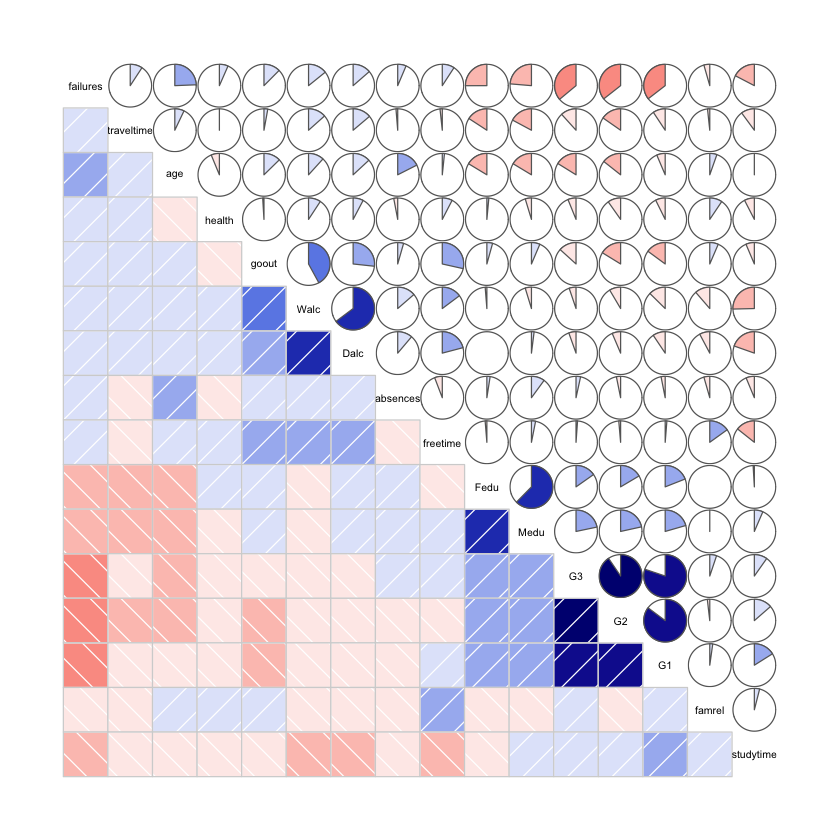

In [37]:
corrgram(df, order =TRUE, lower.panel = panel.shade, upper.panel = panel.pie, text.panel = panel.txt)

ERROR: Error in inherits(x, "theme"): argument "e2" is missing, with no default


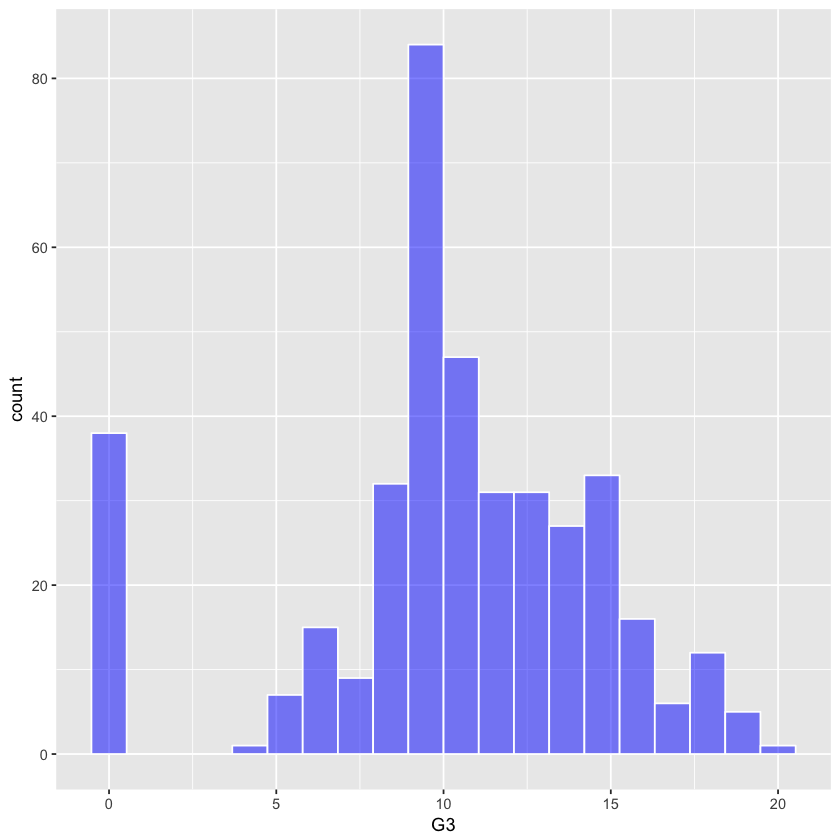

In [42]:
ggplot(df,  aes(x=G3)) + geom_histogram(bins = 20, alpha = 0.5, fill = 'blue', color = 'white') 
   + theme_minimal()

In [43]:
library(caTools)

In [50]:
set.seed(101)

#Slipt up the sample, randomly assigns a booleans to a new columns "sample"
sample = sample.split(df$age, SplitRatio = 0.70) #70% percent of sample = TRUE

#Training Data 
train = subset(df, sample == TRUE)
#Testing Data
test = subset(df, sample == FALSE)

## Trainning the model

In [48]:
model = lm(G3 ~ . , train)

In [51]:
summary(model)


Call:
lm(formula = G3 ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.7681 -0.6423  0.2294  1.0691  4.5942 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -1.329568   2.474569  -0.537 0.591574    
schoolMS          0.838581   0.470545   1.782 0.076016 .  
sexM              0.034883   0.275586   0.127 0.899382    
age              -0.214994   0.119579  -1.798 0.073472 .  
addressU          0.067190   0.326035   0.206 0.836905    
famsizeLE3       -0.111068   0.283228  -0.392 0.695302    
PstatusT         -0.153653   0.401679  -0.383 0.702417    
Medu              0.279949   0.171111   1.636 0.103164    
Fedu             -0.221275   0.151103  -1.464 0.144422    
Mjobhealth        0.002065   0.610532   0.003 0.997304    
Mjobother         0.509947   0.403195   1.265 0.207209    
Mjobservices      0.475476   0.435332   1.092 0.275857    
Mjobteacher       0.285345   0.550640   0.518 0.604802    
Fjobhealth        0.433

# Visualize the model

In [53]:
#Get the residual
res = residuals(model)

#Convert dataframe for ggplot
res = as.data.frame(res)


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


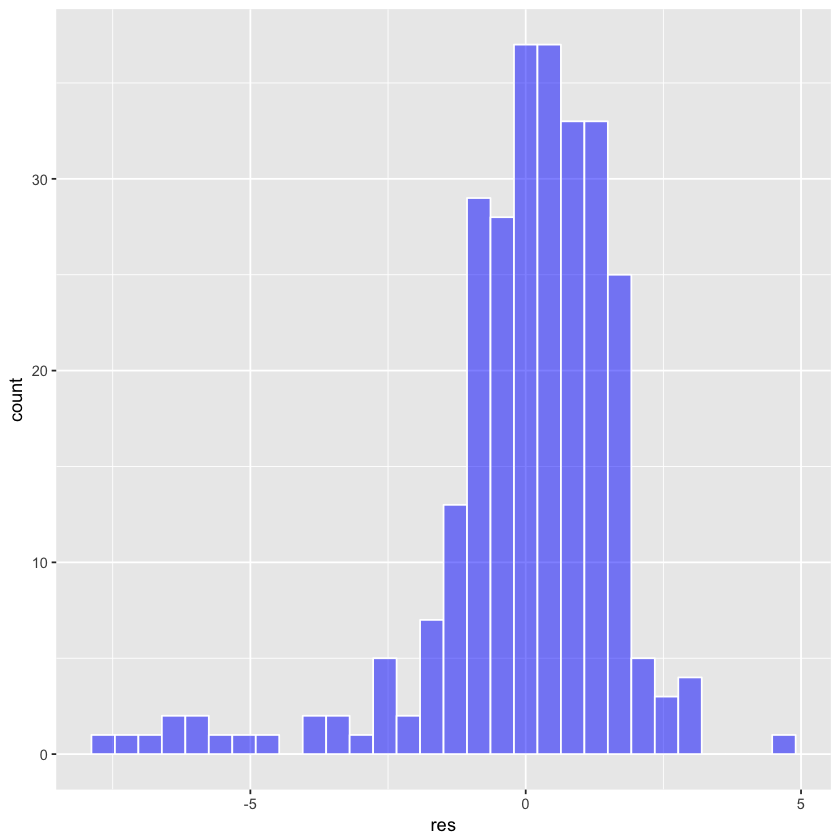

In [54]:
ggplot(res, aes(res)) + geom_histogram(fill = 'blue', color = 'white', alpha = 0.5)

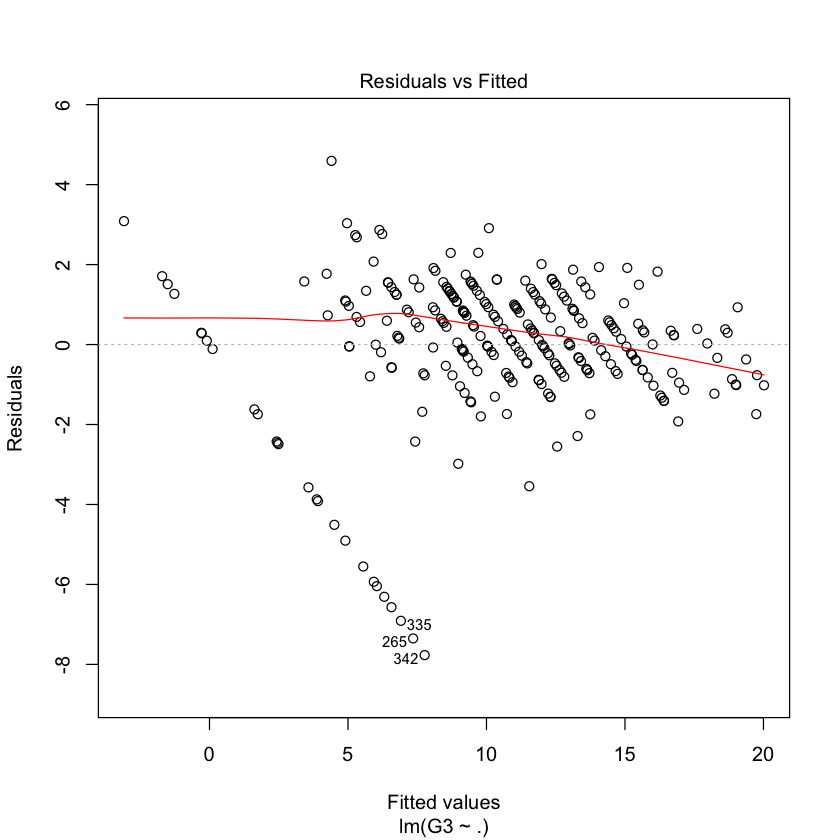

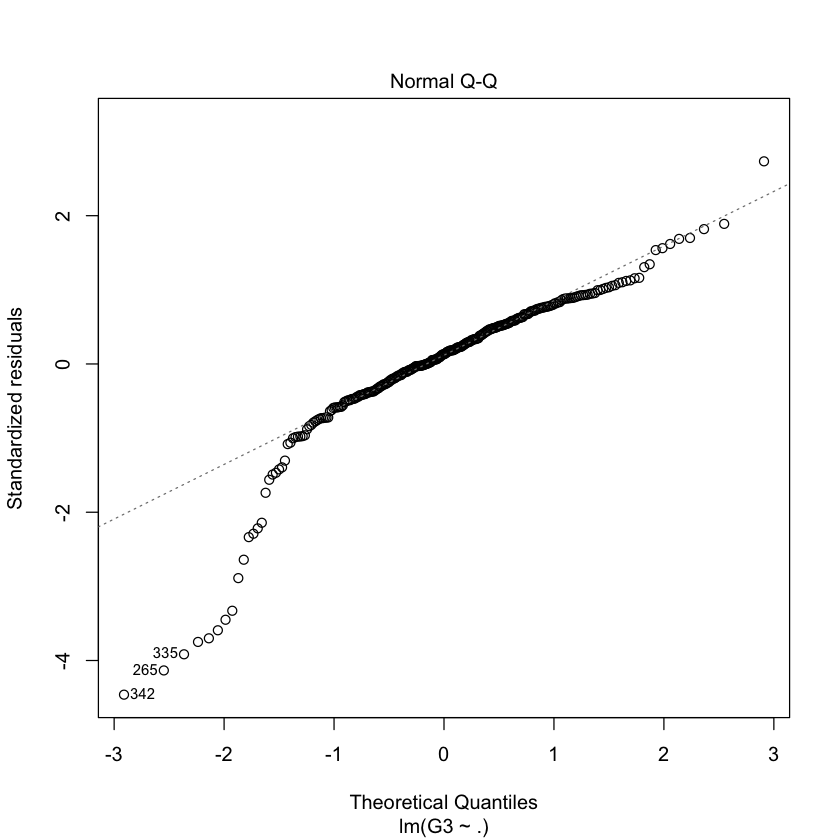

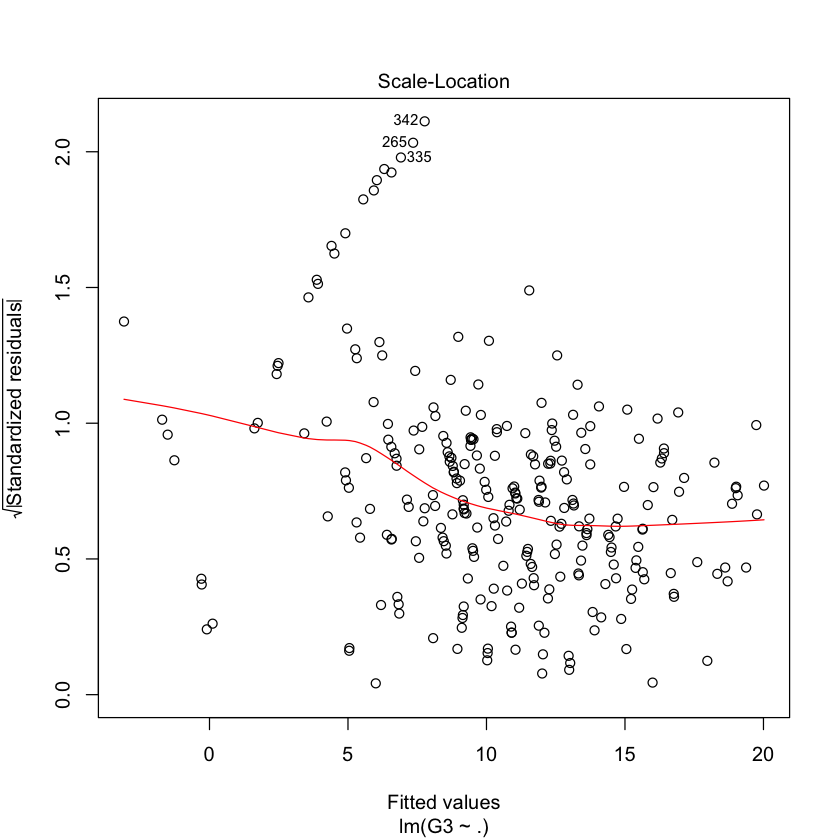

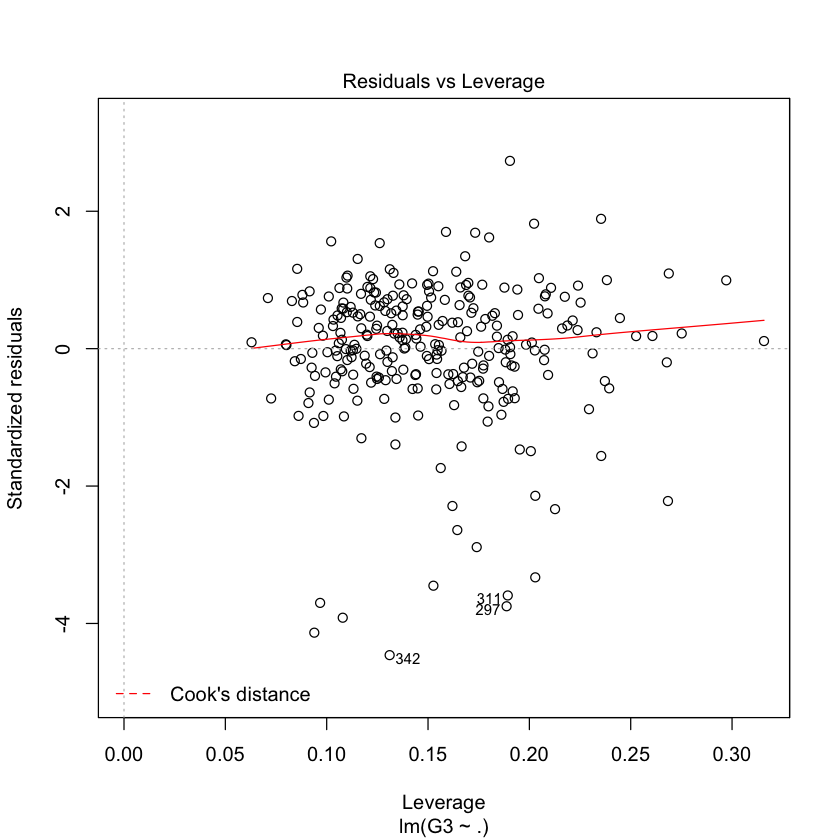

In [55]:
plot(model)

# Predictions

In [56]:
G3.predictions = predict(model, test)


In [59]:
results = cbind(G3.predictions, test$G3)
colnames(results) = c('predicted', 'actual')
results = as.data.frame(results)
head(results)

,predicted,actual
2,3.835533,6
3,7.148456,10
4,13.257794,15
8,5.088100,6
15,14.934291,16
16,13.835679,14


In [60]:
#take care the negative values
to_zero = function(x) {
    if (x<0) {
        return(0)
    }
    else {
        return(x)
    }
}

In [67]:
results$pred = sapply(results$pred, to_zero)

In [68]:
mse = mean((results$actual - results$pred)^2)
mse

[1] 4.411405

In [69]:
mse^0.5


[1] 2.100335

# Boston Data Set 

In [2]:
library(MASS)
lm.fit = lm(medv~lstat, data = Boston)

In [3]:
lm.fit


Call:
lm(formula = medv ~ lstat, data = Boston)

Coefficients:
(Intercept)        lstat  
      34.55        -0.95  


In [4]:
summary(lm.fit)


Call:
lm(formula = medv ~ lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


In [5]:
confint(lm.fit)

,2.5 %,97.5 %
(Intercept),33.448457,35.6592247
lstat,-1.026148,-0.8739505


In [6]:
predict(lm.fit, data.frame(lstat = c(5,10,15)), interval = "confidence")

,fit,lwr,upr
1,29.80359,29.00741,30.59978
2,25.05335,24.47413,25.63256
3,20.30310,19.73159,20.87461


In [7]:
predict(lm.fit, data.frame(lstat = c(5,10,15)), interval = "prediction")

,fit,lwr,upr
1,29.80359,17.565675,42.04151
2,25.05335,12.827626,37.27907
3,20.30310,8.077742,32.52846


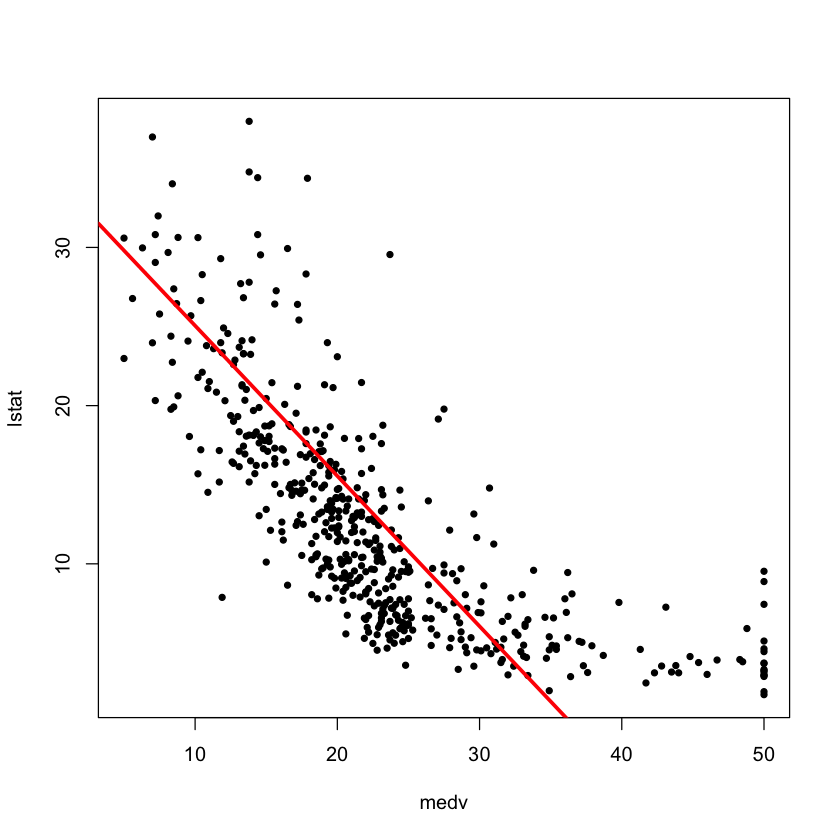

In [13]:
plot(lstat ~ medv, data = Boston, pch = 20)
abline(lm.fit, col = "red", lwd = 3)


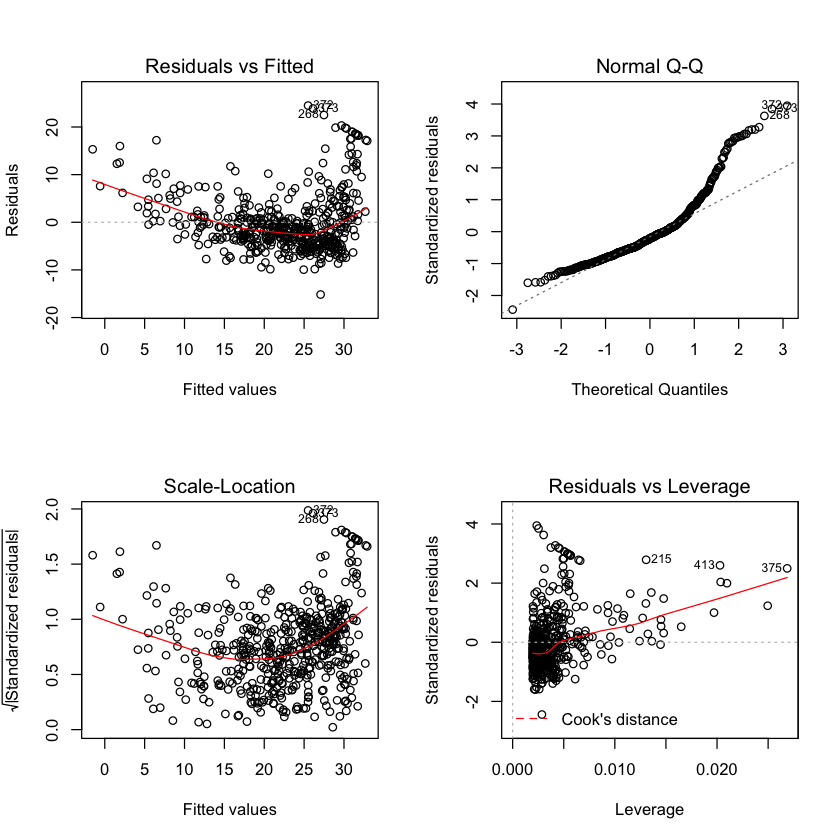

In [15]:
par(mfrow = c(2,2))
plot(lm.fit)

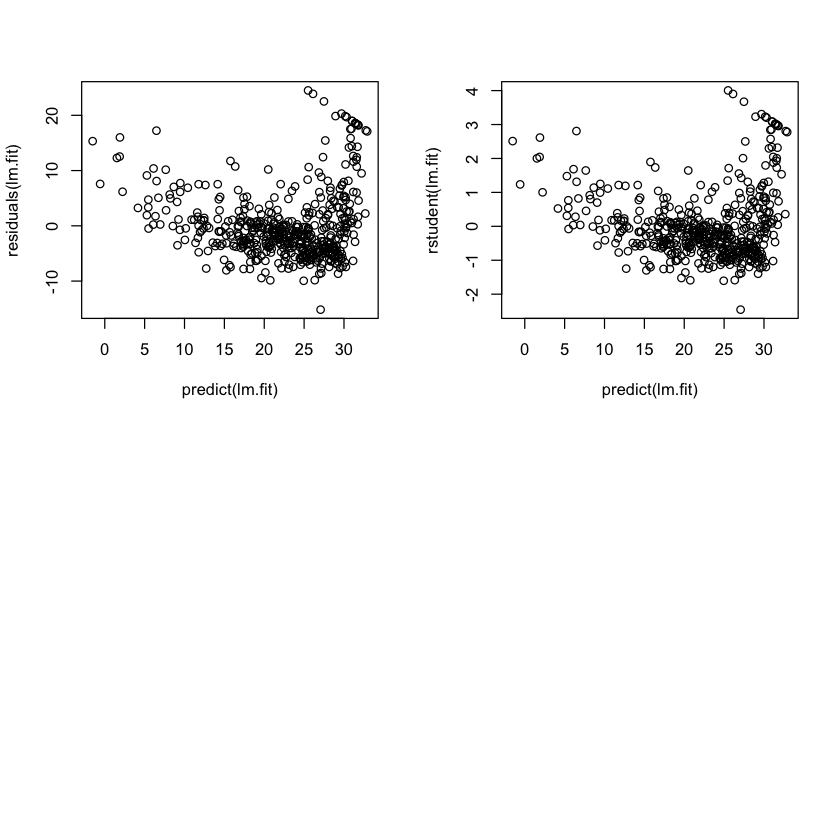

In [18]:
par(mfrow = c(2,2))
plot(predict(lm.fit), residuals(lm.fit))
plot(predict(lm.fit), rstudent(lm.fit))

375 
375

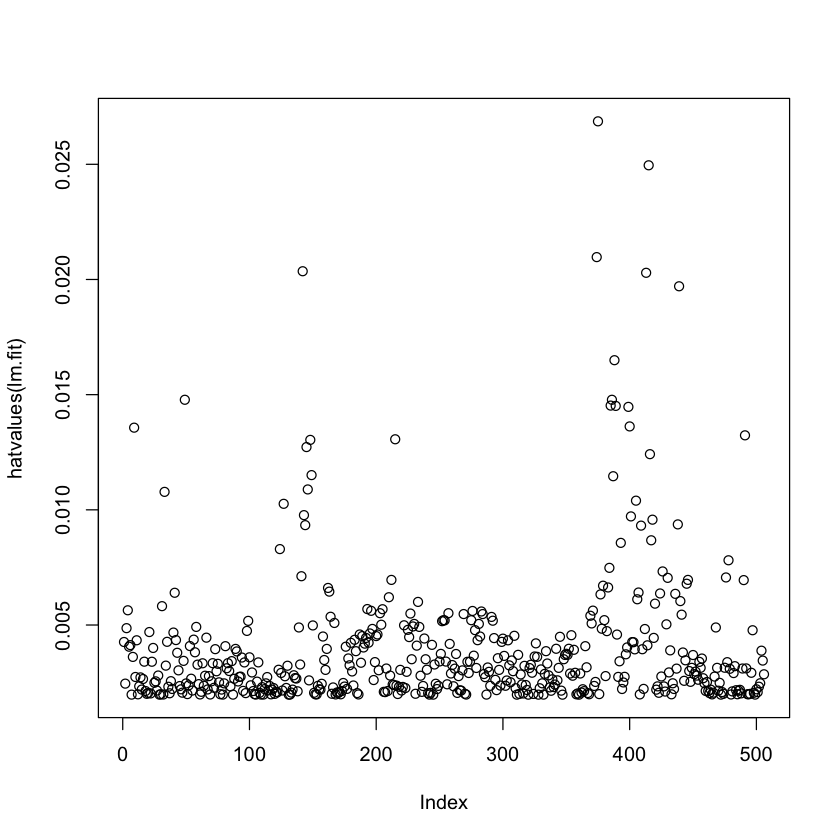

In [20]:
plot(hatvalues(lm.fit))
which.max(hatvalues(lm.fit))

# Multiple Linear Regression

In [21]:
lm.fit = lm(medv ~ lstat + age, data = Boston)
summary(lm.fit)


Call:
lm(formula = medv ~ lstat + age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.981  -3.978  -1.283   1.968  23.158 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.22276    0.73085  45.458  < 2e-16 ***
lstat       -1.03207    0.04819 -21.416  < 2e-16 ***
age          0.03454    0.01223   2.826  0.00491 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.173 on 503 degrees of freedom
Multiple R-squared:  0.5513,	Adjusted R-squared:  0.5495 
F-statistic:   309 on 2 and 503 DF,  p-value: < 2.2e-16


In [22]:
lm.fit = lm(medv ~ ., data = Boston)
summary(lm.fit)


Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  0